In [22]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import math
import copy
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

!pip install -U sentence-transformers

In [3]:
file_path = "C:/Users/Esra/Desktop/Deep_Learning/Image_Classification/Fashion/Classify_ThreadUp_Images/data/ThredupData.csv"
df = pd.read_csv(file_path)

captions_path = "C:/Users/Esra/Desktop/Deep_Learning/Image_Classification/Fashion/Classify_ThreadUp_Images/item_descriptions.csv"
captions = pd.read_csv(captions_path)

In [15]:
documents = captions["description"]
filename = captions["filename"]

In [16]:
# # https://huggingface.co/sentence-transformers/paraphrase-MiniLM-L6-v2
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')
embeddings = model.encode(documents)

docDB= []
for ind, embedding in enumerate(embeddings):
  docDB.append((embedding, documents[ind], filename[ind]))

print(len(docDB))

151


In [28]:
example_sentence = "a woman shirt classic and well-fit red color - shirt "

# embed sentence
embedded_sentence = model.encode([example_sentence])[0]
# similarity comparison with entire db
best_match_similarity = -9999
matched_desc = None
matched_filename = None

for (embedding, doc, fname) in docDB:
  sim = np.dot(embedded_sentence, embedding)
  if (sim > best_match_similarity):
    best_match_similarity = sim
    matched_desc = doc
    matched_filename = fname

matched_desc


"This is a women's white, likely cotton, button-up blouse with ruffle detailing on the shoulders, a straight fit, long sleeves with buttoned cuffs, and a classic pointed collar, embodying a romantic or Victorian-inspired style that could be versatile for both casual and formal occasions."

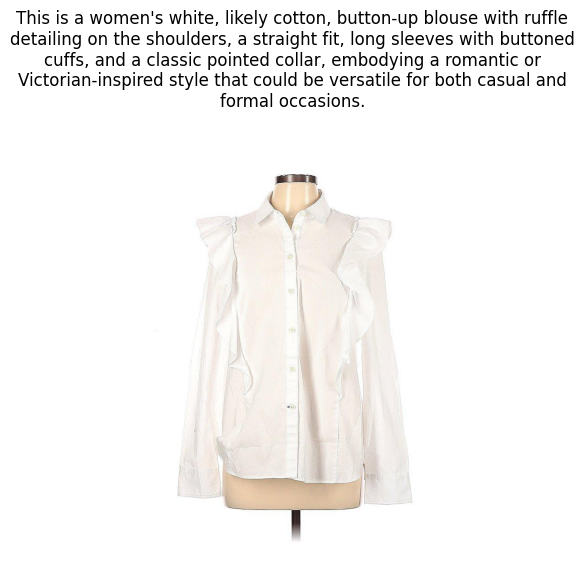

In [29]:
# Base directory of your images
output_dir = "C:/Users/Esra/Desktop/Deep_Learning/Image_Classification/Fashion/Classify_ThreadUp_Images/data/StanfordJpegs/jpeg_folder/"

img_path = os.path.join(output_dir, matched_filename)

# Open the image
img = Image.open(img_path)

# Set up the matplotlib figure
plt.figure(figsize=(6, 6))

# Display the image
plt.imshow(img)
plt.axis('off')  # Remove axis ticks

# Display the description
plt.title(matched_desc, wrap=True)

# Show the plot
plt.show()